# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

The aim of the project is to analyse data of Megaline company and to come to conclusion which of the two plans (Surf or Ultimate) brings more revenue in order to help them to adjust the advertising budjet of the company.

Hypotheses of the project
* The average revenue from users of Ultimate and Surf calling plan differs.
* The average revenue from users in NY - NJ area is different from that of the users from other regions.

## Initialization

In [4158]:
# Loading all the libraries

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [4159]:
# Load the data files into different DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

The data of the project are given in five tables. The five tables give information about:

* The calls done in every month.
* The amount of internet used in every month.
* The messages performed in every month.
* Detail information and deals about Surf and Ultimate plans. 
* Users general behavior about the calls, internet, messages and plan deals.

### Explore initial data
The project contains the following DataFrames:



The users table (data on users) contains the following fields:
- user_id — unique user identifier
- first_name — user's name
- last_name — user's last name
- age — user's age (years)
- reg_date — subscription date (dd, mm, yy)
- churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- city — user's city of residence
- plan — calling plan name

The calls DataFrame contains the following fields:
- `id' — unique call identifier
- `call_date' — call date
- 'duration' — call duration (in minutes)
- `user_id' — the identifier of the user making the call

The internet table (data on web sessions) contains the following fields:
- id — unique session identifier
- mb_used — the volume of data spent during the session (in megabytes)
- session_date — web session date
- user_id — user identifier

The messages table (data on texts) contains the following fields:
- id — unique text message identifier
- message_date — text message date
- user_id — the identifier of the user sending the text


The plans table (data on the plans) contains the following fields:
- plan_name — calling plan name
- usd_monthly_fee — monthly charge in US dollars
- minutes_included — monthly minute allowance
- messages_included — monthly text allowance
- mb_per_month_included — data volume allowance (in megabytes)
- usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- usd_per_message — price per text after exceeding the package limits
- usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)


## Plans

In [4160]:
# Print the general/summary information about the plans' DataFrame

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4161]:
# To know the number of columns and rows in the DataFrame
df_plans.shape

(2, 8)

In [4162]:
# To get information about statistical character of the DataFrame
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4163]:
# To confirm the missing values of the DataFrame
df_plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [4164]:
# Print a sample of data for plans
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The DataFrame df_plans has 2 rows and 8 columns. The DataFrame has object, int64 and float64. The DataFrame has no missing values. It looks the data types are appropriate but the payment for column 'mb_per_month_included' should be converted to giga byte because the payment is done on giga byte, not in mega byte.There should be a new column or rename the column 'mb_per_month_included' that has a unit in giga byte. Better to create the 'gb_per_month_included' column incase we may need it.

## Fix data

A new column 'gb_per_month_included' will be included in the DataFrame. Since 1 gb = 1024 mb, in order to convert unit of column 'gb_per_month_included' from mega byte into giga byte, we should divide the 'mb_per_month_included' column by 1024 then the column 'gb_per_month_included' will be in giga byte.

In [4165]:
# To create a new column 'gb_per_month_included'

df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

In [4166]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


## Enrich data

The data type of the new column 'gb_per_month_included' is float64. Its data type should be converted from float64 into int64.

In [4167]:
df_plans['gb_per_month_included'] = df_plans['gb_per_month_included'].astype(np.int64)


In [4168]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 272.0+ bytes


In [4169]:
# To get general information about the dadat frame
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


The data type of the 'gb_per_month_included' column converted fron float64 into int64.

## Users

In [4170]:
# Print the general/summary information about the users' DataFrame

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4171]:
# To get the number of rows and columns in the dataframe
df_users.shape

(500, 8)

In [4172]:
# To get statistical properties of the data frame
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [4173]:
# To confirm if there are missing values
df_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [4174]:
# Print a sample of data for users

df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [4175]:
# To find out the missing values of the columns
df_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [4176]:
# To get the missing values of the DataFrame df_users
df_users_missing = df_users.isna().sum().to_frame()
df_users_missing

,0
user_id,0
first_name,0
last_name,0
age,0
city,0
reg_date,0
plan,0
churn_date,466


In [4177]:
# To get the percentile information of the columns in the dataframe
df_users.isnull().sum()*100/len(df_users)


user_id        0.0
first_name     0.0
last_name      0.0
age            0.0
city           0.0
reg_date       0.0
plan           0.0
churn_date    93.2
dtype: float64

In [4178]:
df_users['churn_date'].unique()

array([nan, '2018-12-18', '2018-11-16', '2018-09-07', '2018-12-30',
       '2018-10-07', '2018-12-31', '2018-11-24', '2018-11-11',
       '2018-12-12', '2018-11-14', '2018-12-27', '2018-11-29',
       '2018-12-22', '2018-11-30', '2018-10-13', '2018-07-31',
       '2018-12-15', '2018-12-19', '2018-10-03', '2018-10-22',
       '2018-08-16', '2018-12-26', '2018-09-01', '2018-11-21',
       '2018-08-19', '2018-12-10', '2018-09-17', '2018-11-18',
       '2018-09-18'], dtype=object)

The DataFrame has 8 columns and 500 rows. The DataFrame has object, int64 and float64. The DataFrame has missing values in the column 'churn_date'. It looks some data types are inappropriate. The data type of 'reg_date' and 'churn_date' columns should be converted from object to date/time data type.

### Fix Data

In this DataFrame the column 'reg_date' data type is converted into datetime. The 'churn_date' column has 93% missing values. 

In [4179]:
# Converting the data type of the column 
df_users['reg_date']= pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users['churn_date']= pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')

In [4180]:
# Confirm whether the data type is converted.
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enrich Data

In order to enrich the DataFrame, we should separate year, month and days of the 'reg_date' and 'churn_date' columns

In [4181]:
# Extract the year separately 
df_users['reg_year'] = pd.to_datetime(df_users['reg_date']).dt.year

In [4182]:
# Extract the month separately 
df_users['reg_month'] = pd.to_datetime(df_users['reg_date']).dt.month_name()

In [4183]:
# Extract the day separately 
df_users['reg_day'] = df_users['reg_date'].dt.day_name()

In [4184]:
# Extract the year separately 
df_users['churn_year'] = pd.to_datetime(df_users['churn_date']).dt.year

In [4185]:
# Extract the month separately 
df_users['churn_month'] = pd.to_datetime(df_users['churn_date']).dt.month_name()

In [4186]:
# Extract the day separately 
df_users['churn_day'] = df_users['churn_date'].dt.day_name()

In [4187]:
# Convert the data type from float64 into int64
df_users['churn_year'] = df_users['churn_year'].astype(str)

In [4188]:
# Confirm the general/summary information about the DataFrame
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan         500 non-null    object        
 7   churn_date   34 non-null     datetime64[ns]
 8   reg_year     500 non-null    int64         
 9   reg_month    500 non-null    object        
 10  reg_day      500 non-null    object        
 11  churn_year   500 non-null    object        
 12  churn_month  34 non-null     object        
 13  churn_day    34 non-null     object        
dtypes: datetime64[ns](2), int64(3), object(9)
memory usage: 54.8+ KB


The 'churn_date' column has 93% missing values. I descided to drop them. That is, the 'churn_date', 'churn_day', 'churn_month', and 'churn_year' columns.

In [4189]:
# To drop the 'churn_date', 'churn_day', 'churn_month', and 'churn_year' columns.
df_users.drop(['churn_date', 'churn_day', 'churn_month', 'churn_year'], axis=1, inplace = True)

In [4190]:
# Get information of the df_users
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   reg_year    500 non-null    int64         
 8   reg_month   500 non-null    object        
 9   reg_day     500 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 39.2+ KB


In [4191]:
# Confirm the DataFrame printing the sample
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,reg_year,reg_month,reg_day
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018,December,Monday
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018,August,Monday
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018,October,Sunday
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018,January,Sunday
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018,May,Wednesday
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2018,November,Thursday
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018,November,Tuesday
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2018,July,Wednesday
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018,August,Friday
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018,April,Sunday


## Calls

In [4192]:
# Print the general/summary information about the calls' DataFrame
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4193]:
# Get the number of rows and columns of the dataframe
df_calls.shape

(137735, 4)

In [4194]:
# Get statistical characteristics of the dataframe
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [4195]:
# Confirm whether there are missing values or not
df_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [4368]:
# Print a sample of data for calls
df_calls.head(10)


,id,user_id,call_date,duration,call_year,call_month,call_day
0,1000_93,1000,2018-12-27,9,2018,December,Thursday
1,1000_145,1000,2018-12-27,14,2018,December,Thursday
2,1000_247,1000,2018-12-27,15,2018,December,Thursday
3,1000_309,1000,2018-12-28,6,2018,December,Friday
4,1000_380,1000,2018-12-30,5,2018,December,Sunday
5,1000_388,1000,2018-12-31,3,2018,December,Monday
6,1000_510,1000,2018-12-27,6,2018,December,Thursday
7,1000_521,1000,2018-12-28,15,2018,December,Friday
8,1000_530,1000,2018-12-28,6,2018,December,Friday
9,1000_544,1000,2018-12-26,5,2018,December,Wednesday


In [4197]:
# To understand the statistics character of the 'duration' column
df_calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

The DataFrame df_calls has 4 columns and 137,734 rows. The DataFrame has object, int64 and float64 data types. The data type of the 'call_date' columns should be fixed to the right data type.

From the above information it is obtained minimum and maximum duration are 0.0 and 37.60 minutes respectively. There is duration difference between median and mean values that is 0.77 minutes which is almost equivalent to 46 seconds. 

It is confirmed that the calls DataFrame has no missing values.

The min, max, median and mean values of the 'duration' columns are 0, 38, 6 and 7.147. The 0 duration indicates some customers didn't a call.

### Fix data

The column 'call_date' in the df_calls DataFrame has a data type of object and the 'duration' column has a data type of float64. The data type of these two columns should be converted to the right data types. The data type of the 'call_date' should be datetime and for the 'duration' data type should be int as every second round up into minutes as a result all calls are whole numbers that is why it is needed to convert the float64 into int64.

In [4198]:
# convert column 'call_date' from object to datetime data type
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

In [4199]:
# Converting the data type of the 'duration' column from float64 into int64
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')

In [4200]:
# Second way of converting the data type of the 'duration' column from float64 into int64 with out using apply
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
df_calls['duration']

0          9
1         14
2         15
3          6
4          5
          ..
137730     9
137731    11
137732     9
137733     1
137734    14
Name: duration, Length: 137735, dtype: int64

In [4201]:
# To confirm if the data type is converted
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


In [4202]:
# To confirm if the 'duration' column is rounded up
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
5,1000_388,1000,2018-12-31,3
6,1000_510,1000,2018-12-27,6
7,1000_521,1000,2018-12-28,15
8,1000_530,1000,2018-12-28,6
9,1000_544,1000,2018-12-26,5


The data type of the 'call_date' is converted into datetime and 'duration' into int64.

### Enrich data

In order to enrich the DataFrame, we should separate year, month and days

In [4203]:
# Extract the year separately 
df_calls['call_year'] = pd.to_datetime(df_calls['call_date']).dt.year

In [4204]:
# Extract the month separately 
df_calls['call_month'] = df_calls['call_date'].dt.month_name()

In [4205]:
# Extract the day separately 
df_calls['call_day'] = df_calls['call_date'].dt.day_name()

In [4206]:
# To confirm if the day. month and year are extracted 
df_calls.head(10)

,id,user_id,call_date,duration,call_year,call_month,call_day
0,1000_93,1000,2018-12-27,9,2018,December,Thursday
1,1000_145,1000,2018-12-27,14,2018,December,Thursday
2,1000_247,1000,2018-12-27,15,2018,December,Thursday
3,1000_309,1000,2018-12-28,6,2018,December,Friday
4,1000_380,1000,2018-12-30,5,2018,December,Sunday
5,1000_388,1000,2018-12-31,3,2018,December,Monday
6,1000_510,1000,2018-12-27,6,2018,December,Thursday
7,1000_521,1000,2018-12-28,15,2018,December,Friday
8,1000_530,1000,2018-12-28,6,2018,December,Friday
9,1000_544,1000,2018-12-26,5,2018,December,Wednesday


In [4207]:
# Confirm the general/summary information about DataFrame
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          137735 non-null  object        
 1   user_id     137735 non-null  int64         
 2   call_date   137735 non-null  datetime64[ns]
 3   duration    137735 non-null  int64         
 4   call_year   137735 non-null  int64         
 5   call_month  137735 non-null  object        
 6   call_day    137735 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 7.4+ MB


## Messages

In [4208]:
# Print the general/summary information about the messages' DataFrame
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [4209]:
# The number of rows and columns of the message dataframe
df_messages.shape

(76051, 3)

In [4210]:
# Statistical behaviours of the message dataframe
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [4211]:
# Corfirm the missing values of the message dataframe
df_messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [4212]:
# Print a sample of data for messages
df_messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


The DataFrame df_messages has 3 columns and 76,051 rows. The DataFrame has object and int64 data types. The data type of the 'message_date' columns should be converted into the right data type datetime. The DataFrame has no missing values. The 'message_date' will be categorized into day, month and year.

### Fix data

The data type of the column 'message_date' will be converted fron object into datetime.

In [4213]:
# convert column 'call_date' from object to datetime data type
df_messages['message_date'] = df_messages['message_date'].astype('datetime64[ns]')

In [4214]:
# To confirm if the data type is converted into datetime
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [4215]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

### Enrich data

In order to enrich the DataFrame, we should separate year, month and days

In [4216]:
# Extract the year separately 
df_messages['message_year'] = pd.to_datetime(df_messages['message_date']).dt.year

In [4217]:
# Extract the month separately 
df_messages['message_month'] = df_messages['message_date'].dt.month_name()

In [4218]:
# Extract the day separately 
df_messages['message_day'] = df_messages['message_date'].dt.day_name()

In [4219]:
# To confirm if the year, month and day of the DataFrame are extracted.
df_messages.head(10)

,id,user_id,message_date,message_year,message_month,message_day
0,1000_125,1000,2018-12-27,2018,December,Thursday
1,1000_160,1000,2018-12-31,2018,December,Monday
2,1000_223,1000,2018-12-31,2018,December,Monday
3,1000_251,1000,2018-12-27,2018,December,Thursday
4,1000_255,1000,2018-12-26,2018,December,Wednesday
5,1000_346,1000,2018-12-29,2018,December,Saturday
6,1000_386,1000,2018-12-30,2018,December,Sunday
7,1000_413,1000,2018-12-31,2018,December,Monday
8,1000_502,1000,2018-12-27,2018,December,Thursday
9,1000_525,1000,2018-12-28,2018,December,Friday


## Internet

In [4220]:
# Print the general/summary information about the internet DataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [4221]:
# To find the number of rows and columns
df_internet.shape

(104825, 4)

In [4222]:
# To get the median and mean of the numeric columns of the DataFrame
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [4223]:
# To confirm if there are missing values in the DataFrame
df_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [4224]:
# Print a sample of data for the internet traffic

df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


The DataFrame df_internet has 4 columns and 104,825 rows. The DataFrame has object, int64 and float64 data types. The data type of the 'session_date' columns should be fixed to the right data type datetime. 
The df_internet DataFrame has no missing values and there is no exaggerated difference between the mean and median values. 

### Fix data

The data type of the column 'session_date' will be converted fron object into datetime.In addition the internet payment is in giga byte so we should have convert from mega byte into giga byte

In [4225]:
# convert column 'call_date' from object to datetime data type
df_internet['session_date'] = df_internet['session_date'].astype('datetime64[ns]')

In [4226]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

In [4227]:
# converting mega byte into giga byte. 1 gigabyte (gb) = 1024 megabyte (mb)
df_internet['gb_used'] = df_internet['mb_used']/1024

In [4228]:
# Converting the data type of the 'gb_used' column from float64 into int64
df_internet['gb_used'] = df_internet['gb_used'].apply(np.ceil).astype('int')

In [4229]:
# To confirm whether a 'gb_used' column is created and its values becomes int64.
df_internet.head(10)

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,1
1,1000_204,1000,2018-12-31,0.00,0
2,1000_379,1000,2018-12-28,660.40,1
3,1000_413,1000,2018-12-26,270.99,1
4,1000_442,1000,2018-12-27,880.22,1
5,1001_0,1001,2018-08-24,284.68,1
6,1001_3,1001,2018-12-09,656.04,1
7,1001_4,1001,2018-11-04,16.97,1
8,1001_10,1001,2018-11-27,135.18,1
9,1001_15,1001,2018-12-13,761.92,1


### Enrich data

In order to enrich the DataFrame, we should separate year, month and days

In [4230]:
# Extract the year separately 
df_internet['session_year'] = pd.to_datetime(df_internet['session_date']).dt.year

In [4231]:
# Extract the month separately 
df_internet['session_month'] = df_internet['session_date'].dt.month_name()

In [4232]:
# Extract the day separately 
df_internet['session_day'] = df_internet['session_date'].dt.day_name()

In [4233]:
# Confirt the character of the dataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             104825 non-null  object        
 1   user_id        104825 non-null  int64         
 2   session_date   104825 non-null  datetime64[ns]
 3   mb_used        104825 non-null  float64       
 4   gb_used        104825 non-null  int64         
 5   session_year   104825 non-null  int64         
 6   session_month  104825 non-null  object        
 7   session_day    104825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 6.4+ MB


In [4234]:
# Confirm whether all are included in the DataFrame by printing the summary
df_internet.head(10)

,id,user_id,session_date,mb_used,gb_used,session_year,session_month,session_day
0,1000_13,1000,2018-12-29,89.86,1,2018,December,Saturday
1,1000_204,1000,2018-12-31,0.00,0,2018,December,Monday
2,1000_379,1000,2018-12-28,660.40,1,2018,December,Friday
3,1000_413,1000,2018-12-26,270.99,1,2018,December,Wednesday
4,1000_442,1000,2018-12-27,880.22,1,2018,December,Thursday
5,1001_0,1001,2018-08-24,284.68,1,2018,August,Friday
6,1001_3,1001,2018-12-09,656.04,1,2018,December,Sunday
7,1001_4,1001,2018-11-04,16.97,1,2018,November,Sunday
8,1001_10,1001,2018-11-27,135.18,1,2018,November,Tuesday
9,1001_15,1001,2018-12-13,761.92,1,2018,December,Thursday


## Study plan conditions

The DataFrame df_plans will be printed in order to understand the way the plan works and users charged based on their plan subscription.

In [4235]:
# Print out the plan conditions and make sure they are clear for you
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Aggregate data per user


To get clear data as well as to simplify the further analysis we are aggregating data per user per period in order to have just one record per user per period. 

In [4236]:
# Calculate the number of calls made by each user per month. Save the result.
df_calls_month_count = df_calls.groupby(by = ['user_id', 'call_month'])['duration'].count()
df_calls_month_count.head(10)

user_id  call_month
1000     December       16
1001     August         27
         December       56
         November       64
         October        65
         September      49
1002     December       47
         November       55
         October        11
1003     December      149
Name: duration, dtype: int64

In [4237]:
# Calculate the amount of minutes spent by each user per month. Save the result.
df_calls_month_sum = df_calls.groupby(by = ['user_id', 'call_month'])['duration'].sum()
df_calls_month_sum.head(10)

user_id  call_month
1000     December       124
1001     August         182
         December       412
         November       426
         October        393
         September      315
1002     December       384
         November       386
         October         59
1003     December      1104
Name: duration, dtype: int64

In [4238]:
# The number of calls and amount of minutes spend  
df_calls_month = df_calls.groupby(by = ['user_id', 'call_month'])['duration'].agg(['count','sum'])
df_calls_month.head(10)

count   sum
user_id call_month             
1000    December       16   124
1001    August         27   182
        December       56   412
        November       64   426
        October        65   393
        September      49   315
1002    December       47   384
        November       55   386
        October        11    59
1003    December      149  1104

In [4239]:
# Calculate the number of messages sent by each user per month. Save the result.

df_messages_month = df_messages.groupby(by = ['user_id', 'message_month'])['id'].count()
df_messages_month.head(10)

user_id  message_month
1000     December         11
1001     August           30
         December         44
         November         36
         October          53
         September        44
1002     December         41
         November         32
         October          15
1003     December         50
Name: id, dtype: int64

In [4240]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
df_internet_month = df_internet.groupby(by = ['user_id', 'session_month'])['gb_used'].sum()
df_internet_month.head(10)

user_id  session_month
1000     December          4
1001     August           21
         December         55
         November         49
         October          50
         September        41
1002     December         37
         November         45
         October          15
1003     December         53
Name: gb_used, dtype: int64

Putting aggregated data together to form one DataFrame

In [4241]:
# Reseting the index of the DataFrame
df_messages_month = df_messages_month.reset_index()
df_messages_month.head()

,user_id,message_month,id
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53


In [4242]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
data = pd.merge(df_users, df_messages_month, how='outer', left_on = 'user_id', right_on = 'user_id')
data.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,reg_year,reg_month,reg_day,message_month,id
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018,December,Monday,December,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018,August,Monday,August,30.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018,August,Monday,December,44.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018,August,Monday,November,36.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018,August,Monday,October,53.0
5,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018,August,Monday,September,44.0
6,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018,October,Sunday,December,41.0
7,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018,October,Sunday,November,32.0
8,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018,October,Sunday,October,15.0
9,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018,January,Sunday,December,50.0


In [4243]:
# To get general information about the merged dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904 entries, 0 to 1903
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        1904 non-null   int64         
 1   first_name     1904 non-null   object        
 2   last_name      1904 non-null   object        
 3   age            1904 non-null   int64         
 4   city           1904 non-null   object        
 5   reg_date       1904 non-null   datetime64[ns]
 6   plan           1904 non-null   object        
 7   reg_year       1904 non-null   int64         
 8   reg_month      1904 non-null   object        
 9   reg_day        1904 non-null   object        
 10  message_month  1806 non-null   object        
 11  id             1806 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 193.4+ KB


In [4244]:
df_calls_month = df_calls_month.reset_index()
df_calls_month.head()

,user_id,call_month,count,sum
0,1000,December,16,124
1,1001,August,27,182
2,1001,December,56,412
3,1001,November,64,426
4,1001,October,65,393


In [4245]:
# Joining the data DataFrame with the df_calls_month
data = pd.merge(data, df_calls_month, how='outer', left_on = ['user_id', 'message_month'], right_on = ['user_id', 'call_month'])
data.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,reg_year,reg_month,reg_day,message_month,id,call_month,count,sum
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018.0,December,Monday,December,11.0,December,16.0,124.0
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,August,30.0,August,27.0,182.0
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,December,44.0,December,56.0,412.0
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,November,36.0,November,64.0,426.0
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,October,53.0,October,65.0,393.0
5,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,September,44.0,September,49.0,315.0
6,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018.0,October,Sunday,December,41.0,December,47.0,384.0
7,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018.0,October,Sunday,November,32.0,November,55.0,386.0
8,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018.0,October,Sunday,October,15.0,October,11.0,59.0
9,1003,Reynaldo,Jenkins,52.0,"Tulsa, OK MSA",2018-01-28,surf,2018.0,January,Sunday,December,50.0,December,149.0,1104.0


In [4246]:
# Get characteristics of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 0 to 2388
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2389 non-null   int64         
 1   first_name     1904 non-null   object        
 2   last_name      1904 non-null   object        
 3   age            1904 non-null   float64       
 4   city           1904 non-null   object        
 5   reg_date       1904 non-null   datetime64[ns]
 6   plan           1904 non-null   object        
 7   reg_year       1904 non-null   float64       
 8   reg_month      1904 non-null   object        
 9   reg_day        1904 non-null   object        
 10  message_month  1806 non-null   object        
 11  id             1806 non-null   float64       
 12  call_month     2258 non-null   object        
 13  count          2258 non-null   float64       
 14  sum            2258 non-null   float64       
dtypes: datetime64[ns](1),

In [4247]:
# To reset the index of the dataframe
df_internet_month = df_internet_month.reset_index()
df_internet_month.head(10)

,user_id,session_month,gb_used
0,1000,December,4
1,1001,August,21
2,1001,December,55
3,1001,November,49
4,1001,October,50
5,1001,September,41
6,1002,December,37
7,1002,November,45
8,1002,October,15
9,1003,December,53


In [4248]:
# Joining the data DataFrame with df_internet_month DataFrame
data = pd.merge(data, df_internet_month, how='outer', left_on = ['user_id', 'message_month'], right_on = ['user_id', 'session_month'])
data.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,reg_year,reg_month,reg_day,message_month,id,call_month,count,sum,session_month,gb_used
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018.0,December,Monday,December,11.0,December,16.0,124.0,December,4.0
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,August,30.0,August,27.0,182.0,August,21.0
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,December,44.0,December,56.0,412.0,December,55.0
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,November,36.0,November,64.0,426.0,November,49.0
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,October,53.0,October,65.0,393.0,October,50.0
5,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,September,44.0,September,49.0,315.0,September,41.0
6,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018.0,October,Sunday,December,41.0,December,47.0,384.0,December,37.0
7,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018.0,October,Sunday,November,32.0,November,55.0,386.0,November,45.0
8,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018.0,October,Sunday,October,15.0,October,11.0,59.0,October,15.0
9,1003,Reynaldo,Jenkins,52.0,"Tulsa, OK MSA",2018-01-28,surf,2018.0,January,Sunday,December,50.0,December,149.0,1104.0,December,53.0


In [4249]:
# Get information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2875 non-null   int64         
 1   first_name     1904 non-null   object        
 2   last_name      1904 non-null   object        
 3   age            1904 non-null   float64       
 4   city           1904 non-null   object        
 5   reg_date       1904 non-null   datetime64[ns]
 6   plan           1904 non-null   object        
 7   reg_year       1904 non-null   float64       
 8   reg_month      1904 non-null   object        
 9   reg_day        1904 non-null   object        
 10  message_month  1806 non-null   object        
 11  id             1806 non-null   float64       
 12  call_month     2258 non-null   object        
 13  count          2258 non-null   float64       
 14  sum            2258 non-null   float64       
 15  session_month  2277 n

In [4250]:
# Add the plan information
data = pd.merge(data, df_plans, how='left', left_on = 'plan', right_on = 'plan_name')
data.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,reg_year,reg_month,reg_day,...,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018.0,December,Monday,...,4.0,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate,30.0
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,...,21.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,15.0
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,...,55.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,15.0
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,...,49.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,15.0
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,...,50.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,15.0
5,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018.0,August,Monday,...,41.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,15.0
6,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018.0,October,Sunday,...,37.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,15.0
7,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018.0,October,Sunday,...,45.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,15.0
8,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018.0,October,Sunday,...,15.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,15.0
9,1003,Reynaldo,Jenkins,52.0,"Tulsa, OK MSA",2018-01-28,surf,2018.0,January,Sunday,...,53.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,15.0


In [4251]:
# Confirm the general information of the DataFrame data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2875 non-null   int64         
 1   first_name             1904 non-null   object        
 2   last_name              1904 non-null   object        
 3   age                    1904 non-null   float64       
 4   city                   1904 non-null   object        
 5   reg_date               1904 non-null   datetime64[ns]
 6   plan                   1904 non-null   object        
 7   reg_year               1904 non-null   float64       
 8   reg_month              1904 non-null   object        
 9   reg_day                1904 non-null   object        
 10  message_month          1806 non-null   object        
 11  id                     1806 non-null   float64       
 12  call_month             2258 non-null   object        
 13  cou

In [4252]:
# To find the amount of missing values in every column
data.isnull().sum()

user_id                     0
first_name                971
last_name                 971
age                       971
city                      971
reg_date                  971
plan                      971
reg_year                  971
reg_month                 971
reg_day                   971
message_month            1069
id                       1069
call_month                617
count                     617
sum                       617
session_month             598
gb_used                   598
messages_included         971
mb_per_month_included     971
minutes_included          971
usd_monthly_pay           971
usd_per_gb                971
usd_per_message           971
usd_per_minute            971
plan_name                 971
gb_per_month_included     971
dtype: int64

In [4253]:
data[['first_name', 'last_name']] = data[['first_name', 'last_name']].fillna('Unknown')

In [4254]:
# Fillin the missing values of the columns 'city' with emply string
data[['city']] = data[['city']].fillna('')

In [4255]:
# Mean value of the 'age' column
data['age'].mean()

45.634453781512605

In [4256]:
# Median value of the 'age' column
data['age'].median()

46.0

I prefered to use mean rather than median to fill the missing values of the 'age' column as the mean and median are almost the same.

In [4257]:
data['age'] = data['age'].fillna(data['age'].mean())

In [4258]:
# Statistical character of the 'id' column
data['id'].describe()

count    1806.000000
mean       42.110188
std        33.122931
min         1.000000
25%        17.000000
50%        34.000000
75%        59.000000
max       266.000000
Name: id, dtype: float64

There is difference between mean and median of the 'id' column. I prefered to fill the missing values with median.

In [4259]:
# Filling the missing values of the 'id' column with median value
data['id'] = data['id'].fillna(data['id'].median())

In [4260]:
# Fill the missing year with 2018 as the information was gathered on 2018
data['reg_year'].fillna(2018, inplace=True)

Find the mode of the columns in order to help eo fill the missing values.


In [4261]:
data['reg_day'].mode()

0    Thursday
dtype: object

In [4262]:
data['reg_month'].mode()

0    April
dtype: object

In [4263]:
data['call_month'].mode()

0    December
dtype: object

In [4264]:
data['message_month'].mode()

0    December
dtype: object

In [4265]:
data['session_month'].mode()

0    December
dtype: object

In [4266]:
data['reg_date'].mode()

0   2018-04-21
dtype: datetime64[ns]

In [4267]:
# Filling the missing value of the 'reg_year' with the mode result
data['reg_date'].fillna('2018-04-21', inplace=True)

In [4268]:
# Filling the missing values with mode
data.fillna({'reg_day':'Thursday', 'reg_month': 'April', 'call_month': 'December'}, inplace=True)

In [4269]:
# Filling the missing values with mode
data.fillna({'message_month':'December', 'session_month': 'December'}, inplace=True)

In [4270]:
# Statistical behavior of the column
data['count'].describe()

count    2258.000000
mean       60.998671
std        31.770869
min         1.000000
25%        39.000000
50%        60.000000
75%        80.000000
max       205.000000
Name: count, dtype: float64

In [4271]:
# Statistical behavior of the column
data['sum'].describe()

count    2258.000000
mean      435.937555
std       231.972343
min         0.000000
25%       275.000000
50%       429.000000
75%       574.750000
max      1510.000000
Name: sum, dtype: float64

In [4272]:
# Statistical behavior of the column
data['gb_used'].describe()

count    2277.000000
mean       40.719807
std        17.169414
min         1.000000
25%        31.000000
50%        42.000000
75%        52.000000
max       132.000000
Name: gb_used, dtype: float64

Since the mean and median values of the 'count', 'sum' and 'gb_used' columns are almost the same, I prefered to fill the misssing values with the mean

In [4273]:
# To fill the 'count', 'sum' and 'gb_used' with zero value as the users didn't use them
data[['count','sum', 'gb_used']] =  data[['count','sum', 'gb_used']].fillna(0)

The nan values of the internet, message and calls are filled with zero values.

In [4274]:
# Statistical behavior of the column
data['messages_included'].describe()

count    1904.000000
mean      355.856092
std       443.980706
min        50.000000
25%        50.000000
50%        50.000000
75%      1000.000000
max      1000.000000
Name: messages_included, dtype: float64

In [4275]:
data['mb_per_month_included'].describe()

count     1904.000000
mean     20305.210084
std       7178.466995
min      15360.000000
25%      15360.000000
50%      15360.000000
75%      30720.000000
max      30720.000000
Name: mb_per_month_included, dtype: float64

In [4276]:
# Statistical behavior of the column
data['minutes_included'].describe()

count    1904.000000
mean     1304.884454
std      1168.370279
min       500.000000
25%       500.000000
50%       500.000000
75%      3000.000000
max      3000.000000
Name: minutes_included, dtype: float64

In [4277]:
# Statistical behavior of the column
data['usd_monthly_pay'].describe()

count    1904.000000
mean       36.097689
std        23.367406
min        20.000000
25%        20.000000
50%        20.000000
75%        70.000000
max        70.000000
Name: usd_monthly_pay, dtype: float64

In [4278]:
# Statistical behavior of the column
data['usd_per_gb'].describe()

count    1904.000000
mean        9.034139
std         1.402044
min         7.000000
25%         7.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: usd_per_gb, dtype: float64

In [4279]:
# Statistical behavior of the column
data['usd_per_message'].describe()

count    1904.000000
mean        0.023561
std         0.009347
min         0.010000
25%         0.010000
50%         0.030000
75%         0.030000
max         0.030000
Name: usd_per_message, dtype: float64

In [4280]:
# Statistical behavior of the column
data['usd_per_minute'].describe()

count    1904.000000
mean        0.023561
std         0.009347
min         0.010000
25%         0.010000
50%         0.030000
75%         0.030000
max         0.030000
Name: usd_per_minute, dtype: float64

In [4281]:
# Statistical behavior of the column
data['gb_per_month_included'].describe()

count    1904.000000
mean       19.829307
std         7.010222
min        15.000000
25%        15.000000
50%        15.000000
75%        30.000000
max        30.000000
Name: gb_per_month_included, dtype: float64

Using a condition I filled the missing values of the following columns

In [4282]:
# Using a condition I filled the missing values of the following column
cond = data['plan'] == 'surf'
data['messages_included'] = data['messages_included'].fillna(cond.map({True:50, False: 1000}))

In [4283]:
# Using a condition I filled the missing values of the following column
cond = data['plan'] == 'surf'
data['minutes_included'] = data['minutes_included'].fillna(cond.map({True:500, False: 3000}))

In [4284]:
# Using a condition I filled the missing values of the following column
cond = data['plan'] == 'surf'
data['usd_monthly_pay'] = data['usd_monthly_pay'].fillna(cond.map({True:20, False: 70}))

In [4285]:
# Using a condition I filled the missing values of the following column
cond = data['plan'] == 'surf'
data['usd_per_gb'] = data['usd_per_gb'].fillna(cond.map({True:10, False: 7}))

In [4286]:
# Using a condition I filled the missing values of the following column
cond = data['plan'] == 'surf'
data['usd_per_message'] = data['usd_per_message'].fillna(cond.map({True:0.03, False: 0.01}))

In [4287]:
# Using a condition I filled the missing values of the following column
cond = data['plan'] == 'surf'
data['usd_per_minute'] = data['usd_per_minute'].fillna(cond.map({True:0.03, False: 0.01}))

In [4288]:
# Using a condition I filled the missing values of the following column
cond = data['plan'] == 'surf'
data['mb_per_month_included'] = data['mb_per_month_included'].fillna(cond.map({True: 15360, False: 30720}))

In [4289]:
# Using a condition I filled the missing values of the following column
cond = data['plan'] == 'surf'
data['gb_per_month_included'] = data['gb_per_month_included'].fillna(cond.map({True: 15, False: 30}))

In [4290]:
# Using a condition I filled the missing values of the following column
cond = data['usd_monthly_pay'] == 20
data['plan_name'] = data['plan_name'].fillna(cond.map({True: 'surf', False: 'ultimate'}))

In [4291]:
# Because 'plan' and 'plan_name' columns are the same I deleted the 'plan' column
del data['plan']

In [4292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2875 non-null   int64  
 1   first_name             2875 non-null   object 
 2   last_name              2875 non-null   object 
 3   age                    2875 non-null   float64
 4   city                   2875 non-null   object 
 5   reg_date               2875 non-null   object 
 6   reg_year               2875 non-null   float64
 7   reg_month              2875 non-null   object 
 8   reg_day                2875 non-null   object 
 9   message_month          2875 non-null   object 
 10  id                     2875 non-null   float64
 11  call_month             2875 non-null   object 
 12  count                  2875 non-null   float64
 13  sum                    2875 non-null   float64
 14  session_month          2875 non-null   object 
 15  gb_u

In [4293]:
data.isna().sum()

user_id                  0
first_name               0
last_name                0
age                      0
city                     0
reg_date                 0
reg_year                 0
reg_month                0
reg_day                  0
message_month            0
id                       0
call_month               0
count                    0
sum                      0
session_month            0
gb_used                  0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
gb_per_month_included    0
dtype: int64

It is confirmed that all the missing values are filled.

To calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan).

To calculate the monthly revenue first calculate the difference between the total consumption and free packages 

In [4294]:
# Calculate the monthly revenue for each user
# First calculate the difference between the total consumption and free packages
data['calls_difference_month'] = data['sum'] - data['minutes_included']
data['messages_difference_month'] = data['id'] - data['messages_included']
data['internet_difference_month'] = data['gb_used'] - data['gb_per_month_included']
data.head()


,user_id,first_name,last_name,age,city,reg_date,reg_year,reg_month,reg_day,message_month,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,calls_difference_month,messages_difference_month,internet_difference_month
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24 00:00:00,2018.0,December,Monday,December,...,3000.0,70.0,7.0,0.01,0.01,ultimate,30.0,-2876.0,-989.0,-26.0
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,August,...,500.0,20.0,10.0,0.03,0.03,surf,15.0,-318.0,-20.0,6.0
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,December,...,500.0,20.0,10.0,0.03,0.03,surf,15.0,-88.0,-6.0,40.0
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,November,...,500.0,20.0,10.0,0.03,0.03,surf,15.0,-74.0,-14.0,34.0
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,October,...,500.0,20.0,10.0,0.03,0.03,surf,15.0,-107.0,3.0,35.0


In [4295]:
# To calculate the monthly revenue
def monthly_revenue(row):
    revenue = 0
    if row['calls_difference_month'] > 0:
        revenue = row['calls_difference_month'] *row['usd_per_minute']
    if row['messages_difference_month'] > 0:
        revenue += row['messages_difference_month']*row['usd_per_message'] 
    if row['internet_difference_month'] > 0:
        revenue += row['internet_difference_month']*row['usd_per_gb']
    return revenue + row['usd_monthly_pay']

data['revenue'] = data.apply(monthly_revenue, axis = 1)

data.head(10)


,user_id,first_name,last_name,age,city,reg_date,reg_year,reg_month,reg_day,message_month,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,calls_difference_month,messages_difference_month,internet_difference_month,revenue
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24 00:00:00,2018.0,December,Monday,December,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2876.0,-989.0,-26.0,70.00
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,August,...,20.0,10.0,0.03,0.03,surf,15.0,-318.0,-20.0,6.0,80.00
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,December,...,20.0,10.0,0.03,0.03,surf,15.0,-88.0,-6.0,40.0,420.00
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,November,...,20.0,10.0,0.03,0.03,surf,15.0,-74.0,-14.0,34.0,360.00
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,October,...,20.0,10.0,0.03,0.03,surf,15.0,-107.0,3.0,35.0,370.09
5,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,September,...,20.0,10.0,0.03,0.03,surf,15.0,-185.0,-6.0,26.0,280.00
6,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21 00:00:00,2018.0,October,Sunday,December,...,20.0,10.0,0.03,0.03,surf,15.0,-116.0,-9.0,22.0,240.00
7,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21 00:00:00,2018.0,October,Sunday,November,...,20.0,10.0,0.03,0.03,surf,15.0,-114.0,-18.0,30.0,320.00
8,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21 00:00:00,2018.0,October,Sunday,October,...,20.0,10.0,0.03,0.03,surf,15.0,-441.0,-35.0,0.0,20.00
9,1003,Reynaldo,Jenkins,52.0,"Tulsa, OK MSA",2018-01-28 00:00:00,2018.0,January,Sunday,December,...,20.0,10.0,0.03,0.03,surf,15.0,604.0,0.0,38.0,418.12


In [4296]:
# General information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    2875 non-null   int64  
 1   first_name                 2875 non-null   object 
 2   last_name                  2875 non-null   object 
 3   age                        2875 non-null   float64
 4   city                       2875 non-null   object 
 5   reg_date                   2875 non-null   object 
 6   reg_year                   2875 non-null   float64
 7   reg_month                  2875 non-null   object 
 8   reg_day                    2875 non-null   object 
 9   message_month              2875 non-null   object 
 10  id                         2875 non-null   float64
 11  call_month                 2875 non-null   object 
 12  count                      2875 non-null   float64
 13  sum                        2875 non-null   float

## Study user behaviour


To have a clear picture about the overall data descriptive statistics will be done for the aggregated and merged data.


### Calls

In [4297]:
# Filtering the data based on the plan
# Sample DataFrame of the surf plan
data_surf = data.query('plan_name == "surf"')
data_surf.head(10)

,user_id,first_name,last_name,age,city,reg_date,reg_year,reg_month,reg_day,message_month,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,calls_difference_month,messages_difference_month,internet_difference_month,revenue
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,August,...,20.0,10.0,0.03,0.03,surf,15.0,-318.0,-20.0,6.0,80.00
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,December,...,20.0,10.0,0.03,0.03,surf,15.0,-88.0,-6.0,40.0,420.00
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,November,...,20.0,10.0,0.03,0.03,surf,15.0,-74.0,-14.0,34.0,360.00
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,October,...,20.0,10.0,0.03,0.03,surf,15.0,-107.0,3.0,35.0,370.09
5,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,September,...,20.0,10.0,0.03,0.03,surf,15.0,-185.0,-6.0,26.0,280.00
6,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21 00:00:00,2018.0,October,Sunday,December,...,20.0,10.0,0.03,0.03,surf,15.0,-116.0,-9.0,22.0,240.00
7,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21 00:00:00,2018.0,October,Sunday,November,...,20.0,10.0,0.03,0.03,surf,15.0,-114.0,-18.0,30.0,320.00
8,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21 00:00:00,2018.0,October,Sunday,October,...,20.0,10.0,0.03,0.03,surf,15.0,-441.0,-35.0,0.0,20.00
9,1003,Reynaldo,Jenkins,52.0,"Tulsa, OK MSA",2018-01-28 00:00:00,2018.0,January,Sunday,December,...,20.0,10.0,0.03,0.03,surf,15.0,604.0,0.0,38.0,418.12
10,1004,Leonila,Thompson,40.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23 00:00:00,2018.0,May,Wednesday,August,...,20.0,10.0,0.03,0.03,surf,15.0,-146.0,-25.0,55.0,570.00


In [4298]:
# Sample DataFrame of the surf plan
data_ultimate = data.query('plan_name == "ultimate"')
data_ultimate.head(10)

,user_id,first_name,last_name,age,city,reg_date,reg_year,reg_month,reg_day,message_month,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,calls_difference_month,messages_difference_month,internet_difference_month,revenue
0,1000,Anamaria,Bauer,45.000000,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24 00:00:00,2018.0,December,Monday,December,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2876.0,-989.0,-26.0,70.0
19,1006,Jesusa,Bradford,73.000000,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27 00:00:00,2018.0,November,Tuesday,December,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2941.0,-861.0,32.0,294.0
20,1006,Jesusa,Bradford,73.000000,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27 00:00:00,2018.0,November,Tuesday,November,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2990.0,-985.0,-23.0,70.0
26,1008,Emely,Hoffman,53.000000,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03 00:00:00,2018.0,August,Friday,December,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2366.0,-974.0,10.0,140.0
27,1008,Emely,Hoffman,53.000000,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03 00:00:00,2018.0,August,Friday,November,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2554.0,-963.0,26.0,252.0
28,1008,Emely,Hoffman,53.000000,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03 00:00:00,2018.0,August,Friday,October,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2524.0,-979.0,18.0,196.0
30,1009,Unknown,Unknown,45.634454,,2018-04-21,2018.0,April,Thursday,December,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2269.0,-966.0,-30.0,70.0
31,1009,Unknown,Unknown,45.634454,,2018-04-21,2018.0,April,Thursday,December,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2244.0,-966.0,-30.0,70.0
32,1009,Unknown,Unknown,45.634454,,2018-04-21,2018.0,April,Thursday,December,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2120.0,-966.0,-30.0,70.0
33,1009,Unknown,Unknown,45.634454,,2018-04-21,2018.0,April,Thursday,December,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2177.0,-966.0,-30.0,70.0


In [4299]:
# General information about the surf plan dataframe
data_surf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 1 to 2363
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    1291 non-null   int64  
 1   first_name                 1291 non-null   object 
 2   last_name                  1291 non-null   object 
 3   age                        1291 non-null   float64
 4   city                       1291 non-null   object 
 5   reg_date                   1291 non-null   object 
 6   reg_year                   1291 non-null   float64
 7   reg_month                  1291 non-null   object 
 8   reg_day                    1291 non-null   object 
 9   message_month              1291 non-null   object 
 10  id                         1291 non-null   float64
 11  call_month                 1291 non-null   object 
 12  count                      1291 non-null   float64
 13  sum                        1291 non-null   float

In [4300]:
# General information about the surf plan dataframe
data_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584 entries, 0 to 2874
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    1584 non-null   int64  
 1   first_name                 1584 non-null   object 
 2   last_name                  1584 non-null   object 
 3   age                        1584 non-null   float64
 4   city                       1584 non-null   object 
 5   reg_date                   1584 non-null   object 
 6   reg_year                   1584 non-null   float64
 7   reg_month                  1584 non-null   object 
 8   reg_day                    1584 non-null   object 
 9   message_month              1584 non-null   object 
 10  id                         1584 non-null   float64
 11  call_month                 1584 non-null   object 
 12  count                      1584 non-null   float64
 13  sum                        1584 non-null   float

In [4301]:
# Statistical characteriatics of the surf plan
data_surf.describe()

,user_id,age,reg_year,id,count,sum,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,calls_difference_month,messages_difference_month,internet_difference_month,revenue
count,1291.000000,1291.000000,1291.0,1291.000000,1291.000000,1291.000000,1291.000000,1291.0,1291.0,1291.0,1291.0,1291.0,1.291000e+03,1.291000e+03,1291.0,1291.000000,1291.000000,1291.000000,1291.000000
mean,1244.246321,44.618125,2018.0,39.783114,57.359411,411.101472,37.645236,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,-88.898528,-10.216886,22.645236,265.638869
std,135.122504,16.741925,0.0,32.169238,34.917147,255.025799,19.701917,0.0,0.0,0.0,0.0,0.0,3.470791e-18,3.470791e-18,0.0,255.025799,32.169238,19.701917,169.824180
min,1001.000000,18.000000,2018.0,1.000000,0.000000,0.000000,0.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,-500.000000,-49.000000,-15.000000,20.000000
25%,1127.000000,29.000000,2018.0,17.000000,33.000000,234.500000,26.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,-265.500000,-33.000000,11.000000,136.410000
50%,1251.000000,45.000000,2018.0,34.000000,58.000000,416.000000,41.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,-84.000000,-16.000000,26.000000,280.000000
75%,1355.000000,61.000000,2018.0,52.000000,79.000000,573.000000,50.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,73.000000,2.000000,35.000000,379.620000
max,1499.000000,75.000000,2018.0,266.000000,205.000000,1510.000000,132.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,15.0,1010.000000,216.000000,117.000000,1210.370000


In [4302]:
# Statistical characteriatics of the surf plan
data_ultimate.describe()

,user_id,age,reg_year,id,count,sum,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,calls_difference_month,messages_difference_month,internet_difference_month,revenue
count,1584.000000,1584.000000,1584.0,1584.000000,1584.000000,1584.000000,1584.000000,1584.0,1584.0,1584.0,1584.0,1584.0,1.584000e+03,1.584000e+03,1584.0,1584.000000,1584.000000,1584.000000,1584.000000
mean,1249.292929,46.462787,2018.0,38.533460,40.204545,286.373106,27.852904,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,-2713.626894,-961.466540,-2.147096,136.040404
std,153.174119,10.454440,0.0,20.853643,38.110420,273.692336,23.675324,0.0,0.0,0.0,0.0,0.0,1.735271e-18,1.735271e-18,0.0,273.692336,20.853643,23.675324,85.893952
min,1000.000000,18.000000,2018.0,1.000000,0.000000,0.000000,0.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,-3000.000000,-999.000000,-30.000000,70.000000
25%,1109.000000,45.634454,2018.0,34.000000,0.000000,0.000000,0.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,-3000.000000,-966.000000,-30.000000,70.000000
50%,1238.500000,45.634454,2018.0,34.000000,38.000000,266.000000,33.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,-2734.000000,-966.000000,3.000000,91.000000
75%,1397.000000,45.634454,2018.0,34.000000,68.000000,483.000000,47.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,-2517.000000,-966.000000,17.000000,189.000000
max,1499.000000,75.000000,2018.0,166.000000,191.000000,1369.000000,107.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,30.0,-1631.000000,-834.000000,77.000000,609.000000


In [4303]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# The mean value of the surf plan

data_surf['sum'].mean()


411.10147172734315

In [4304]:
# The mean value of the surf plan

data_ultimate['sum'].mean()


286.37310606060606

In [4305]:
# Standard Deviation of Surf plan
data_surf['sum'].std()

255.02579852352395

In [4306]:
# Standard Deviation of Ultimate plan
data_ultimate['sum'].std()

273.6923362878749

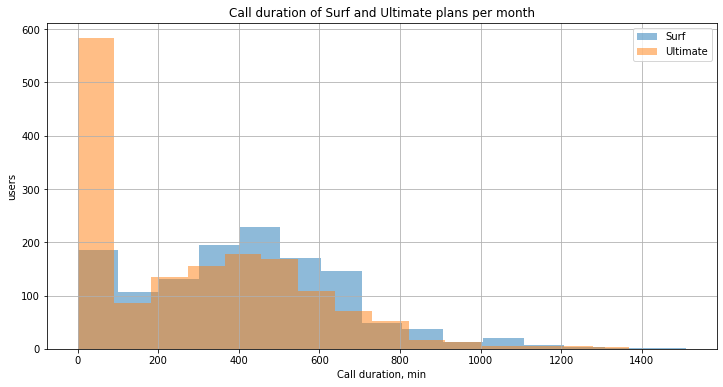

In [4307]:
# Plotting the histogram of the two plans 
plt.figure(figsize=(12,6))
data_surf['sum'].hist(bins = 15,alpha = 0.5, label = 'Surf')
data_ultimate['sum'].hist(bins = 15, alpha = 0.5, label = 'Ultimate')
plt.xlabel('Call duration, min')
plt.ylabel('users')
plt.title('Call duration of Surf and Ultimate plans per month')
plt.legend(loc='upper right')
plt.show ()


In [4308]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
data_surf['call_month'].count()/12

107.58333333333333

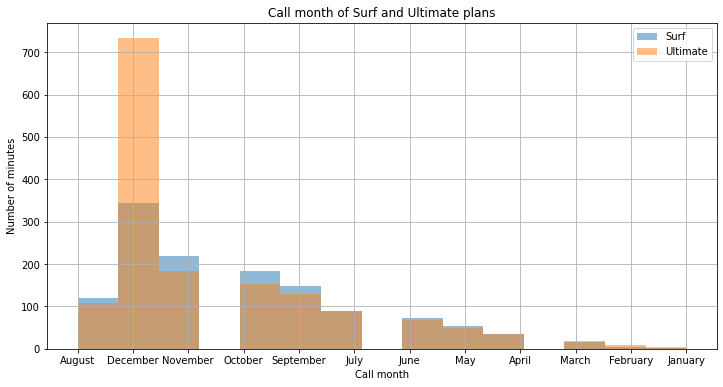

In [4309]:
# Plotting the histogram of the two plans 
plt.figure(figsize=(12,6))
data_surf['call_month'].hist(bins = 15,alpha = 0.5, label = 'Surf')
data_ultimate['call_month'].hist(bins = 15, alpha = 0.5, label = 'Ultimate')
plt.xlabel('Call month')
plt.ylabel('Number of minutes')
plt.title('Call month of Surf and Ultimate plans')
plt.legend(loc='upper right')
plt.show ()



In [4310]:
data_ultimate['call_month'].count()/12

132.0

The number of minutes users of Surf and Ultimate plans require each month are 99.5 and 48.25 respectively. The Surf plan is twice of the Ultimate plan.

The mean and variance of of the surf and ultimate plans

In [4311]:
# Calculate the mean and the variance of the monthly call duration
# The mean value of the surf plan
data_surf['sum'].mean()


411.10147172734315

In [4312]:
# The mean value of the surf plan
data_ultimate['sum'].mean()

286.37310606060606

In [4313]:
# The variance value of the surf plan
data_surf['sum'].var()

65038.15791256102

In [4314]:
# The variance value of the surf plan
data_ultimate['sum'].var()

74907.49494271522

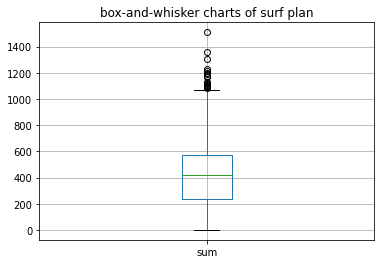

In [4315]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Plotting the box-and-whisker charts of surf plan
data_surf.boxplot('sum')
plt.title('box-and-whisker charts of surf plan')
plt.suptitle('')
plt.show()


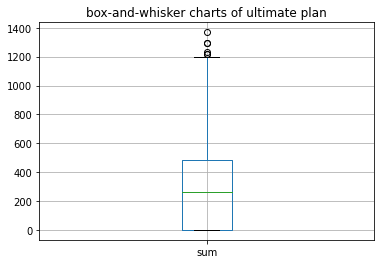

In [4316]:
# Plotting the box-and-whisker charts of ultimate plan
data_ultimate.boxplot('sum')
plt.title('box-and-whisker charts of ultimate plan')
plt.suptitle('')
plt.show()

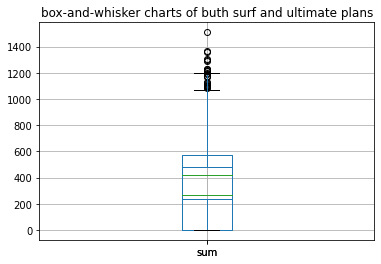

In [4317]:
# Plotting the box-and-whisker charts of surf and ultimate plans together
data_surf.boxplot('sum')
data_ultimate.boxplot('sum')
plt.title('box-and-whisker charts of buth surf and ultimate plans')
plt.suptitle('')
plt.show()



##### Conclusion

* There is slight difference between the average duration of calls per distinct month for Surf and Ultimate plans, that is 411 and 286 respectively. But there is big difference in variance between them that is 65,038 for Surf and 74,907 for Ultimate plans.
* The most call duration for the Surf plan ranges from 300 to 700 and the maximum was 425. But from 700 onwards started to decrease. As observed in the graph most users they don't go beyond 700 and the graph skewed to the right. Where as, in the ultimate plan, most call duration was from 200 to 600 and the maximum high call was 0 i.s the average. and the histogram skewed to the right too.
* Both plans have outliers that is surf plan has outlier beyond 1000 where as Ultimate plan has outliers beyond 1200.

### Messages

In [4318]:
# Compare the number of messages users of each plan tend to send each month
# The mean value of the surf plan
data_surf['id'].mean()

39.783113865220756

In [4319]:
# The mean value of the ultimate plan
data_ultimate['id'].mean()

38.5334595959596

In [4320]:
# Standard Deviation of Ultimate plan
data_surf['id'].std()

32.16923842250426

In [4321]:
# Standard Deviation of Surf plan
data_ultimate['id'].std()

20.853643146849798

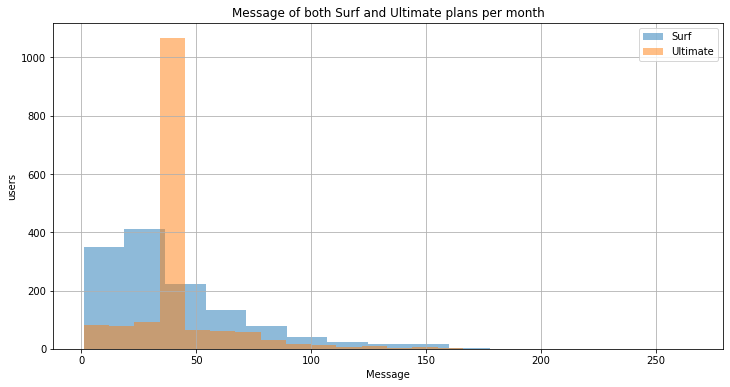

In [4322]:
# Plotting the histogram of Surf plan  
plt.figure(figsize=(12,6))
data_surf['id'].hist(bins = 15,alpha = 0.5, label = 'Surf')
data_ultimate['id'].hist(bins = 15, alpha = 0.5, label = 'Ultimate')
plt.xlabel('Message')
plt.ylabel('users')
plt.title('Message of both Surf and Ultimate plans per month')
plt.legend(loc='upper right')
plt.show ()


The mean and variance of surf and ultimate plans

In [4323]:
# Calculate the mean and the variance of the monthly call duration
# The mean value of the surf plan
data_surf['id'].mean()


39.783113865220756

In [4324]:
# Calculate the mean and the variance of the monthly call duration
# The mean value of the ultimate plan
data_ultimate['id'].mean()


38.5334595959596

In [4325]:
# The variance value of the surf plan
data_surf['id'].var()

1034.859900683924

In [4326]:
# The variance value of the ultimate plan
data_ultimate['id'].var()

434.8744324961555

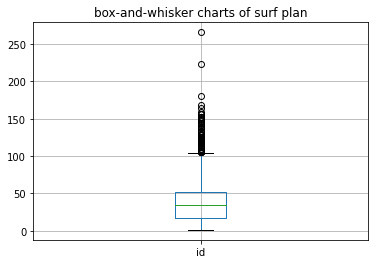

In [4327]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Plotting the box-and-whisker charts of surf plan
data_surf.boxplot('id')
plt.title('box-and-whisker charts of surf plan')
plt.suptitle('')
plt.show()

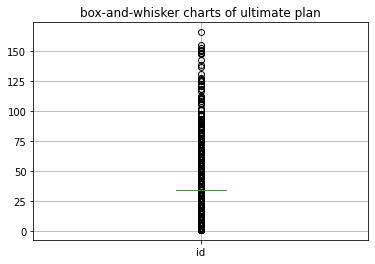

In [4328]:
# Plotting the box-and-whisker charts of ultimate plan
data_ultimate.boxplot('id')
plt.title('box-and-whisker charts of ultimate plan')
plt.suptitle('')
plt.show()

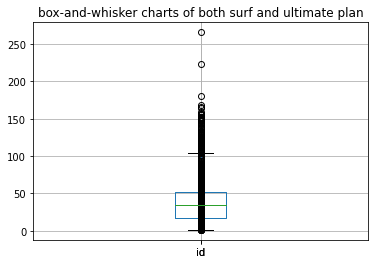

In [4329]:
# Plotting the box-and-whisker charts of both surf and ultimate plan
data_surf.boxplot('id')
data_ultimate.boxplot('id')
plt.title('box-and-whisker charts of both surf and ultimate plan')
plt.suptitle('')
plt.show()


In [4330]:
# Compare the amount of internet traffic consumed by users per plan
data_surf['gb_used'].sum()


48600.0

In [4331]:
# Compare the amount of internet traffic consumed by users per plan
data_ultimate['gb_used'].sum()


44119.0

The amount of internet traffic consumed by users for Surf and Ultimate plans are 48,600 and 44,119 Gbyte respectively. That is users in the Surf plan used twice of users in the Ultimate plan.

##### Conclusion

* The average duration of messages per distinct month for Surf and Ultimate plans are almost the same, that is 39 and 38 respectively. Besides, there is no much difference in variance between them that is 1034 for Surf and 434 for Ultimate plans.
* In Surf plan maximum messages used are from 0 to 50, but beyond 50 starts to decrease and the histogram graph skewed to the right.
* In Ultimate plan most of the messages used are from 0 to 75. The peak value is around 40 and the histogram graph decrease from 75 and skewed to the right.
* Both plans have outliers, the surf plan has only outliers beyond 100 where as the ultimate plan has both up and down outliers.

### Internet

In [4332]:
# Compare the number of messages users of each plan tend to send each month
# The mean value of the surf plan
data_surf['gb_used'].mean()

37.64523625096824

In [4333]:
# The mean value of the ultimate plan
data_ultimate['gb_used'].mean()

27.85290404040404

In [4334]:
# Standard Deviation of Surf plan
data_surf['gb_used'].std()

19.701916606938976

In [4335]:
# Standard Deviation of Ultimate plan
data_ultimate['gb_used'].std()

23.67532448914029

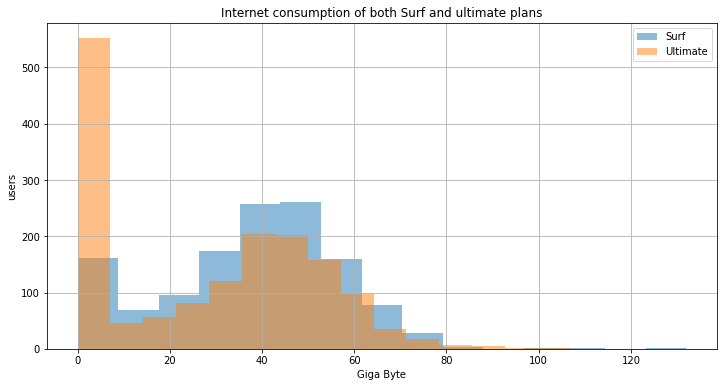

In [4336]:
# Plotting the histogram of the two plans 
plt.figure(figsize=(12,6))
data_surf['gb_used'].hist(bins = 15,alpha = 0.5, label = 'Surf')
data_ultimate['gb_used'].hist(bins = 15, alpha = 0.5, label = 'Ultimate')
plt.xlabel('Giga Byte')
plt.ylabel('users')
plt.title('Internet consumption of both Surf and ultimate plans')
plt.legend(loc='upper right')
plt.show ()

Mean and Variance of Surf and Ultimate plans

In [4337]:
# Calculate the mean and the variance of the monthly call duration
# The mean value of the surf plan
data_surf['gb_used'].mean()


37.64523625096824

In [4338]:
# The mean value of the surf plan
data_ultimate['gb_used'].mean()


27.85290404040404

In [4339]:
# The variance value of the surf plan
data_surf['gb_used'].var()

388.16551798677784

In [4340]:
# The variance value of the ultimate plan
data_ultimate['gb_used'].var()

560.520989666086

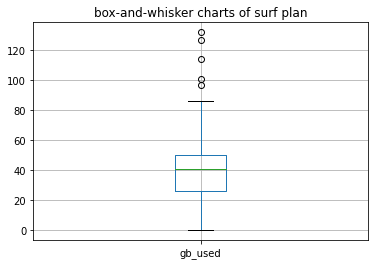

In [4341]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Plotting the box-and-whisker charts of surf plan
data_surf.boxplot('gb_used')
plt.title('box-and-whisker charts of surf plan')
plt.suptitle('')
plt.show()

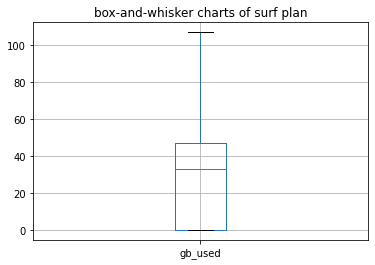

In [4342]:
# Plotting the box-and-whisker charts of ultimate plan
data_ultimate.boxplot('gb_used')
plt.title('box-and-whisker charts of surf plan')
plt.suptitle('')
plt.show()

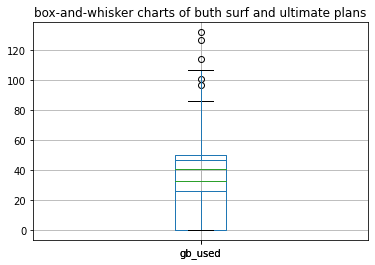

In [4343]:
# Plotting the box-and-whisker charts of surf and ultimate plans together
data_surf.boxplot('gb_used')
data_ultimate.boxplot('gb_used')
plt.title('box-and-whisker charts of buth surf and ultimate plans')
plt.suptitle('')
plt.show()


##### Conclusion

* The average internet per distinct month for Surf and Ultimate plans are the same, that is 37 and 27 respectively.
* There is difference in variance between the two plans that is 388 for Surf and 560 for Ultimate plans.
* The most internet used by both plans are between 30 and 60. The peak value for both plans are around 40. The Surf has maximum value at 40 where as the Ultimate has maximum value at 0. 
* The surf plan has outliers above 90 where as the ultimate plan doesn't show any outliers.

## Revenue

Statistical behavior of the two plans.

In [4344]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# The mean value of the surf plan
data_surf['revenue'].mean()

265.6388690937258

In [4345]:
# The mean value of the Ultimate plan
data_ultimate['revenue'].mean()

136.04040404040404

In [4346]:
# Standard Deviation of Surf plan
data_surf['revenue'].std()

169.82417997170234

In [4347]:
# Standard Deviation of Ultimate plan
data_ultimate['revenue'].std()

85.89395176718841

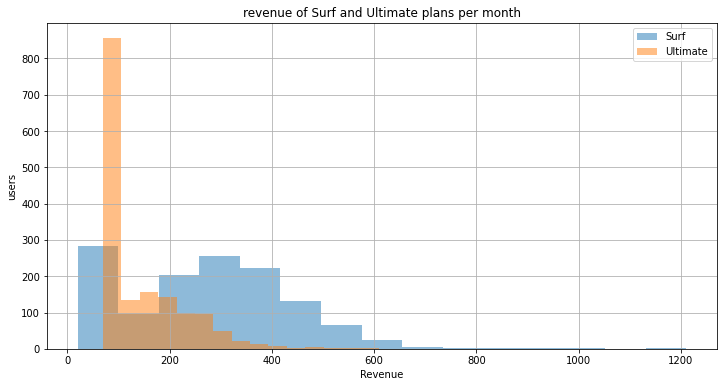

In [4348]:
# Plotting the histogram of the two plans 
plt.figure(figsize=(12,6))
data_surf['revenue'].hist(bins = 15,alpha = 0.5, label = 'Surf')
data_ultimate['revenue'].hist(bins = 15, alpha = 0.5, label = 'Ultimate')
plt.xlabel('Revenue')
plt.ylabel('users')
plt.title('revenue of Surf and Ultimate plans per month')
plt.legend(loc='upper right')
plt.show ()

The mean and variance of of the surf and ultimate plans

In [4349]:
# Calculate the mean and the variance of the monthly call duration
# The mean value of the surf plan
data_surf['revenue'].mean()


265.6388690937258

In [4350]:
# Calculate the mean and the variance of the monthly call duration
# The mean value of the Ultimate plan
data_ultimate['revenue'].mean()


136.04040404040404

In [4351]:
# The standard deviation value of the Surf plan
data_surf['revenue'].std()

169.82417997170234

In [4352]:
# The standard deviation value of the Ultimate plan
data_ultimate['revenue'].std()


85.89395176718841

In [4353]:
# The variance value of the surf plan
data_surf['revenue'].var()

28840.252103061142

In [4354]:
# The variance value of the Ultimate plan
data_ultimate['revenue'].var()

7377.77095018409

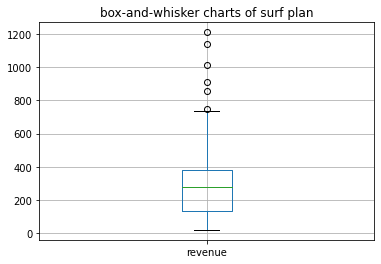

In [4355]:
# Plot a boxplot to visualize the distribution of the monthly Revenue
# Plotting the box-and-whisker charts of surf plan
data_surf.boxplot('revenue')
plt.title('box-and-whisker charts of surf plan')
plt.suptitle('')
plt.show()


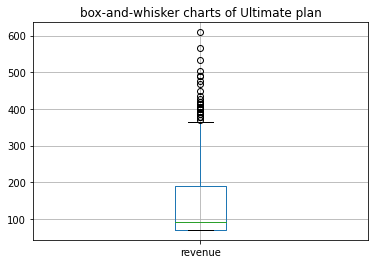

In [4356]:
# Plotting the box-and-whisker charts of Ultimate plan
data_ultimate.boxplot('revenue')
plt.title('box-and-whisker charts of Ultimate plan')
plt.suptitle('')
plt.show()


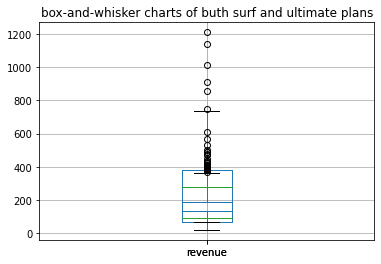

In [4357]:
# Plotting the box-and-whisker charts of surf and ultimate plans together
data_surf.boxplot('revenue')
data_ultimate.boxplot('revenue')
plt.title('box-and-whisker charts of buth surf and ultimate plans')
plt.suptitle('')
plt.show()


##### Conclusion

* The average revenue per distinct month for Surf and Ultimate plans are quite different, that is 265 and 136 respectively.
* The standard deviate for Surf and Ultimate plans are 169 and 85 respectively.
* There is big difference in variance between the two plans that is 28,840 for Surf and 7,377 for Ultimate plans.
* The most revenue for Surf plan is between 0 and 500. The peak revenue is around 50. The histogram skewed to the right.
* The Ultimate plan histogram has a peak revenue around 75 and most ranges are between 50 and 300. The graph skewed to the right.
* Surf plan has outliers beyond 700 where as the Ultimate plan beyond 350.

## Test statistical hypotheses

Comparing the average revenue of the Surf and Ultimate plans alone is not enough to make decission, we need to perform a statistical test using hypothesis on the equality of two population.

In order to test the hypothesis of two statistical population that are equal based on the sample we use,

scripy.stats.ttest_ind(array1, array2, equal_var)


##### Hypotheses 1

The average revenue from users of Ultimate and Surf calling plans differs.



Based on this one, we can formulate:

Null hypothesis H0: The average revenue from users of Ultimate and Surf calling plans is equal.

Alternative hypothesis H1: The average revenue from users of Ultimate and Surf calling plans is not equal.

Alpha value will be 5%.

Statistical test is: Hypothesis on equality of two population.


In [4358]:
# Test the hypotheses
# The two DataFrames to be tested are 
# if the p-value is less than alpha, we reject the hypothesis

data_surf['revenue']
data_ultimate['revenue']


alpha = 0.05  # critical statistical significance level

results = st.ttest_ind(data_surf['revenue'], data_ultimate['revenue'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


p-value:  1.3176492848057893e-138
We reject the null hypothesis


In [4359]:
data_surf['revenue'].mean()


265.6388690937258

In [4360]:
data_ultimate['revenue'].mean()


136.04040404040404

##### Conclusion

The value of alpha is 0.05 but from the above result the p-value is much less than alpha so the Null hypothesis will be rejected because the average revenue from users of Ultimate and Surf calling plans is not equalt which means that the averages of both plans are different. 
The average values of the Surf and Ultimate calling plans are 265 and 136 respectively, which are different.

In [4361]:
# To check the citys' in the plan
data['city'].unique()


array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA', '',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL 

In [4362]:
# Categorizing the data by city
data_city = data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
data_city.head(10)

,user_id,first_name,last_name,age,city,reg_date,reg_year,reg_month,reg_day,message_month,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,calls_difference_month,messages_difference_month,internet_difference_month,revenue
59,1014,Edmundo,Simon,61.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25 00:00:00,2018.0,November,Sunday,December,...,20.0,10.0,0.03,0.03,surf,15.0,614.0,14.0,2.0,58.84
60,1014,Edmundo,Simon,61.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25 00:00:00,2018.0,November,Sunday,November,...,20.0,10.0,0.03,0.03,surf,15.0,-337.0,-41.0,-13.0,20.00
79,1022,Bo,Snow,73.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20 00:00:00,2018.0,April,Friday,December,...,20.0,10.0,0.03,0.03,surf,15.0,-500.0,-16.0,-15.0,20.00
90,1024,Yuki,Tyson,74.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21 00:00:00,2018.0,August,Tuesday,December,...,20.0,10.0,0.03,0.03,surf,15.0,-500.0,-16.0,-15.0,20.00
95,1027,Georgeanna,Cardenas,38.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26 00:00:00,2018.0,June,Tuesday,August,...,20.0,10.0,0.03,0.03,surf,15.0,-139.0,-37.0,32.0,340.00
96,1027,Georgeanna,Cardenas,38.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26 00:00:00,2018.0,June,Tuesday,December,...,20.0,10.0,0.03,0.03,surf,15.0,-207.0,-37.0,21.0,230.00
97,1027,Georgeanna,Cardenas,38.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26 00:00:00,2018.0,June,Tuesday,July,...,20.0,10.0,0.03,0.03,surf,15.0,-153.0,-32.0,20.0,220.00
98,1027,Georgeanna,Cardenas,38.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26 00:00:00,2018.0,June,Tuesday,November,...,20.0,10.0,0.03,0.03,surf,15.0,-100.0,-40.0,27.0,290.00
99,1027,Georgeanna,Cardenas,38.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26 00:00:00,2018.0,June,Tuesday,October,...,20.0,10.0,0.03,0.03,surf,15.0,-83.0,-38.0,20.0,220.00
100,1027,Georgeanna,Cardenas,38.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26 00:00:00,2018.0,June,Tuesday,September,...,20.0,10.0,0.03,0.03,surf,15.0,-175.0,-38.0,28.0,300.00


In [4363]:
# Category of data that don't belong to New York and New Jersey
data_other = data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
data_other.head(10)

,user_id,first_name,last_name,age,city,reg_date,reg_year,reg_month,reg_day,message_month,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,calls_difference_month,messages_difference_month,internet_difference_month,revenue
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24 00:00:00,2018.0,December,Monday,December,...,70.0,7.0,0.01,0.01,ultimate,30.0,-2876.0,-989.0,-26.0,70.00
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,August,...,20.0,10.0,0.03,0.03,surf,15.0,-318.0,-20.0,6.0,80.00
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,December,...,20.0,10.0,0.03,0.03,surf,15.0,-88.0,-6.0,40.0,420.00
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,November,...,20.0,10.0,0.03,0.03,surf,15.0,-74.0,-14.0,34.0,360.00
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,October,...,20.0,10.0,0.03,0.03,surf,15.0,-107.0,3.0,35.0,370.09
5,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,2018.0,August,Monday,September,...,20.0,10.0,0.03,0.03,surf,15.0,-185.0,-6.0,26.0,280.00
6,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21 00:00:00,2018.0,October,Sunday,December,...,20.0,10.0,0.03,0.03,surf,15.0,-116.0,-9.0,22.0,240.00
7,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21 00:00:00,2018.0,October,Sunday,November,...,20.0,10.0,0.03,0.03,surf,15.0,-114.0,-18.0,30.0,320.00
8,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21 00:00:00,2018.0,October,Sunday,October,...,20.0,10.0,0.03,0.03,surf,15.0,-441.0,-35.0,0.0,20.00
9,1003,Reynaldo,Jenkins,52.0,"Tulsa, OK MSA",2018-01-28 00:00:00,2018.0,January,Sunday,December,...,20.0,10.0,0.03,0.03,surf,15.0,604.0,0.0,38.0,418.12


In [4364]:
data['city'].value_counts()

                                                   971
New York-Newark-Jersey City, NY-NJ-PA MSA          300
Los Angeles-Long Beach-Anaheim, CA MSA             124
Chicago-Naperville-Elgin, IL-IN-WI MSA              74
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     67
                                                  ... 
El Paso, TX MSA                                      2
Colorado Springs, CO MSA                             2
Jacksonville, FL MSA                                 2
Raleigh-Cary, NC MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 74, dtype: int64


##### Hypotheses 2

The average revenue from users in NY-NJ area is different from that of the users from other regions.



Based on this one, we can formulate:

Null hypothesis H0: The average revenue from users in NY-NJ area is the same that of the users from other regions.

Alternative hypothesis H1: The average revenue from users in NY-NJ area is different from that of the users from other regions.

Alpha value will be 5%.

Statistical test is: Hypothesis on equality of two population.

In [4365]:
# Test the hypotheses

# Test the hypotheses
# The two DataFrames to be tested are 
# if the p-value is less than alpha, we reject the hypothesis

data_city['revenue']
data_other['revenue']


alpha = 0.05  # critical statistical significance level

results = st.ttest_ind(data_city['revenue'], data_other['revenue'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 




p-value:  2.8396434126964533e-10
We reject the null hypothesis


In [4366]:
data_city['revenue'].mean()

244.21353333333332

In [4367]:
data_other['revenue'].mean()

188.41309514563105

##### Conclusion

The value of alpha is 0.05 but from the above result the p-value is much less than alpha so the Null hypothesis will be rejected because the average revenue from users of Ultimate and Surf calling plans is not equalt which means that the averages of both plans are different. It can be concluded that "The average revenue from users in NY-NJ area is different from the users from other regions. 
 
The average revenue of the 'NY-NJ' and 'Others' shows that they are different, i.e 244 and 188 respectively.

## General conclusion

The data of the project are given in five tables. The five tables give information about:

* The calls done in every month.
* The amount of internet used in every month.
* The messages performed in every month.
* Detail information and deals about Surf and Ultimate plans.
* Users general behavior about the calls, internet, messages and plan deals.

The aim of the project is to analyse data of Megaline company for the Surf or Ultimate plans in order to help them to adjust the advertising budjet of the company.

All missing values were filled and the column 'plan' is dropped because it is the same with the 'plan_name' column.

The two Hypotheses of the project are:

1.  The average revenue from users of Ultimate and Surf calling plan differs.
2.  The average revenue from users in NY - NJ area is different from that of the users from other regions.

The value of alpha is 0.05 but from the above result the p-value is much less than alpha so the Null hypothesis will be rejected because the average revenue from users of Ultimate and Surf calling plans is not equalt which means that the averages of both plans are different. 

The value of alpha is 0.05 but from the above result the p-value is much less than alpha so the Null hypothesis will be rejected because the average revenue from users of Ultimate and Surf calling plans is not equalt which means that the averages of both plans are different. It can be concluded that "The average revenue from users in NY-NJ area is different from the users from other regions. 
 
The average revenue of the 'NY-NJ' and 'Others' shows that they are different, i.e 244 and 188 respectively.
